In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro

In [2]:
# φόρτωση δεδομένων
ded=pd.read_excel('CogTEL_new.xlsx')

In [3]:
# μετατροπή αλφαριθμητικών σε float και παράλληλα μετατροπή "-" σε NaN
ded['education']=pd.to_numeric(ded['education'],errors='coerce')
ded['GDS_6']=pd.to_numeric(ded['GDS_6'],errors='coerce')
ded['GDS_8']=pd.to_numeric(ded['GDS_8'],errors='coerce')
ded['GDS_9']=pd.to_numeric(ded['GDS_9'],errors='coerce')
ded['NPIJ32F']=pd.to_numeric(ded['NPIJ32F'],errors='coerce')

In [4]:
# για να μπορώ να εξάγω τις συγκεκριμένες στήλες (αχρείαστο βήμα...)
ded = ded.rename(columns={'Antidepressants ': 'Antidepressants' })
ded = ded.rename(columns={'Concentration/attention' : 'Concentration_attention'})

In [5]:
# απαιτούμε την εμφάνιση ολόκληρου του συνόλου δεδομένων 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
# αφαίρεση στιγμιοτύπων με missing values
ded=ded.dropna()

In [7]:
# αφαίρεση των παραδειγμάτων ηλικίας 50 και κάτω
dedomena=ded[ded['Age']>49]

In [8]:
dedomena.shape

(504, 61)

In [9]:
# ανάθεση του συνόλου των ανεξάρτητων μεταβλητών και της μεταβλητής στόχου σε Χ και Υ αντίστοιχα
X=dedomena.drop('diagnosis',axis=1)
Y=dedomena.diagnosis

Class=0, n=208 (41.270%)
Class=2, n=79 (15.675%)
Class=1, n=173 (34.325%)
Class=3, n=44 (8.730%)


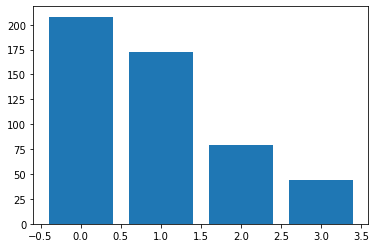

In [10]:
# εμφάνιση δεδομένων ανα κλάση (εμφανίζεται ανισορροπία)
from collections import Counter
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


In [11]:
!pip install imblearn
!pip install imbalanced-learn

Class=0, n=208 (25.000%)
Class=2, n=208 (25.000%)
Class=1, n=208 (25.000%)
Class=3, n=208 (25.000%)


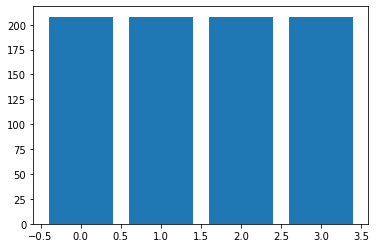

In [12]:
# τεχνική υπερδειγματοληψίας SMOTE 
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE(random_state=7)
X, Y = oversample.fit_resample(X, Y)
# summarize distribution
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


# Eκπαίδευση δέντρου ταξινόμησης με hold-out cv και unpruned (η χειρότερη περίπτωση)

In [13]:
# διαχωρισμός δεδομένων σε train και test set (μέθοδος hold-out)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [15]:
# Eκπαιδεύουμε ένα δέντρο ταξινόμησης με complexity parameter a=0 (προεπιλογή), που σημαίνει όχι κλάδεμα
# η συνάρτηση DecisionTreeClassifier χειρίζεται αυτόματα multi-class προβλήματα 
clf = DecisionTreeClassifier(ccp_alpha=0.0,random_state=34)
clf=clf.fit(X_train,Y_train)


[Text(0.5863447867298578, 0.9615384615384616, 'X[19] <= 3.988\ngini = 0.749\nsamples = 582\nvalue = [139, 139, 142, 162]'),
 Text(0.27636255924170616, 0.8846153846153846, 'X[28] <= 4.976\ngini = 0.675\nsamples = 400\nvalue = [14, 92, 140, 154]'),
 Text(0.10426540284360189, 0.8076923076923077, 'X[45] <= 1.252\ngini = 0.372\nsamples = 125\nvalue = [0, 5, 96, 24]'),
 Text(0.07582938388625593, 0.7307692307692307, 'X[55] <= 4.5\ngini = 0.226\nsamples = 96\nvalue = [0, 4, 84, 8]'),
 Text(0.06635071090047394, 0.6538461538461539, 'X[49] <= 1.29\ngini = 0.177\nsamples = 93\nvalue = [0, 1, 84, 8]'),
 Text(0.04739336492890995, 0.5769230769230769, 'X[12] <= 0.03\ngini = 0.114\nsamples = 83\nvalue = [0, 1, 78, 4]'),
 Text(0.037914691943127965, 0.5, 'X[48] <= 0.5\ngini = 0.333\nsamples = 25\nvalue = [0, 1, 20, 4]'),
 Text(0.02843601895734597, 0.4230769230769231, 'X[8] <= 0.576\ngini = 0.169\nsamples = 22\nvalue = [0, 1, 20, 1]'),
 Text(0.018957345971563982, 0.34615384615384615, 'X[57] <= 16.5\ngini 

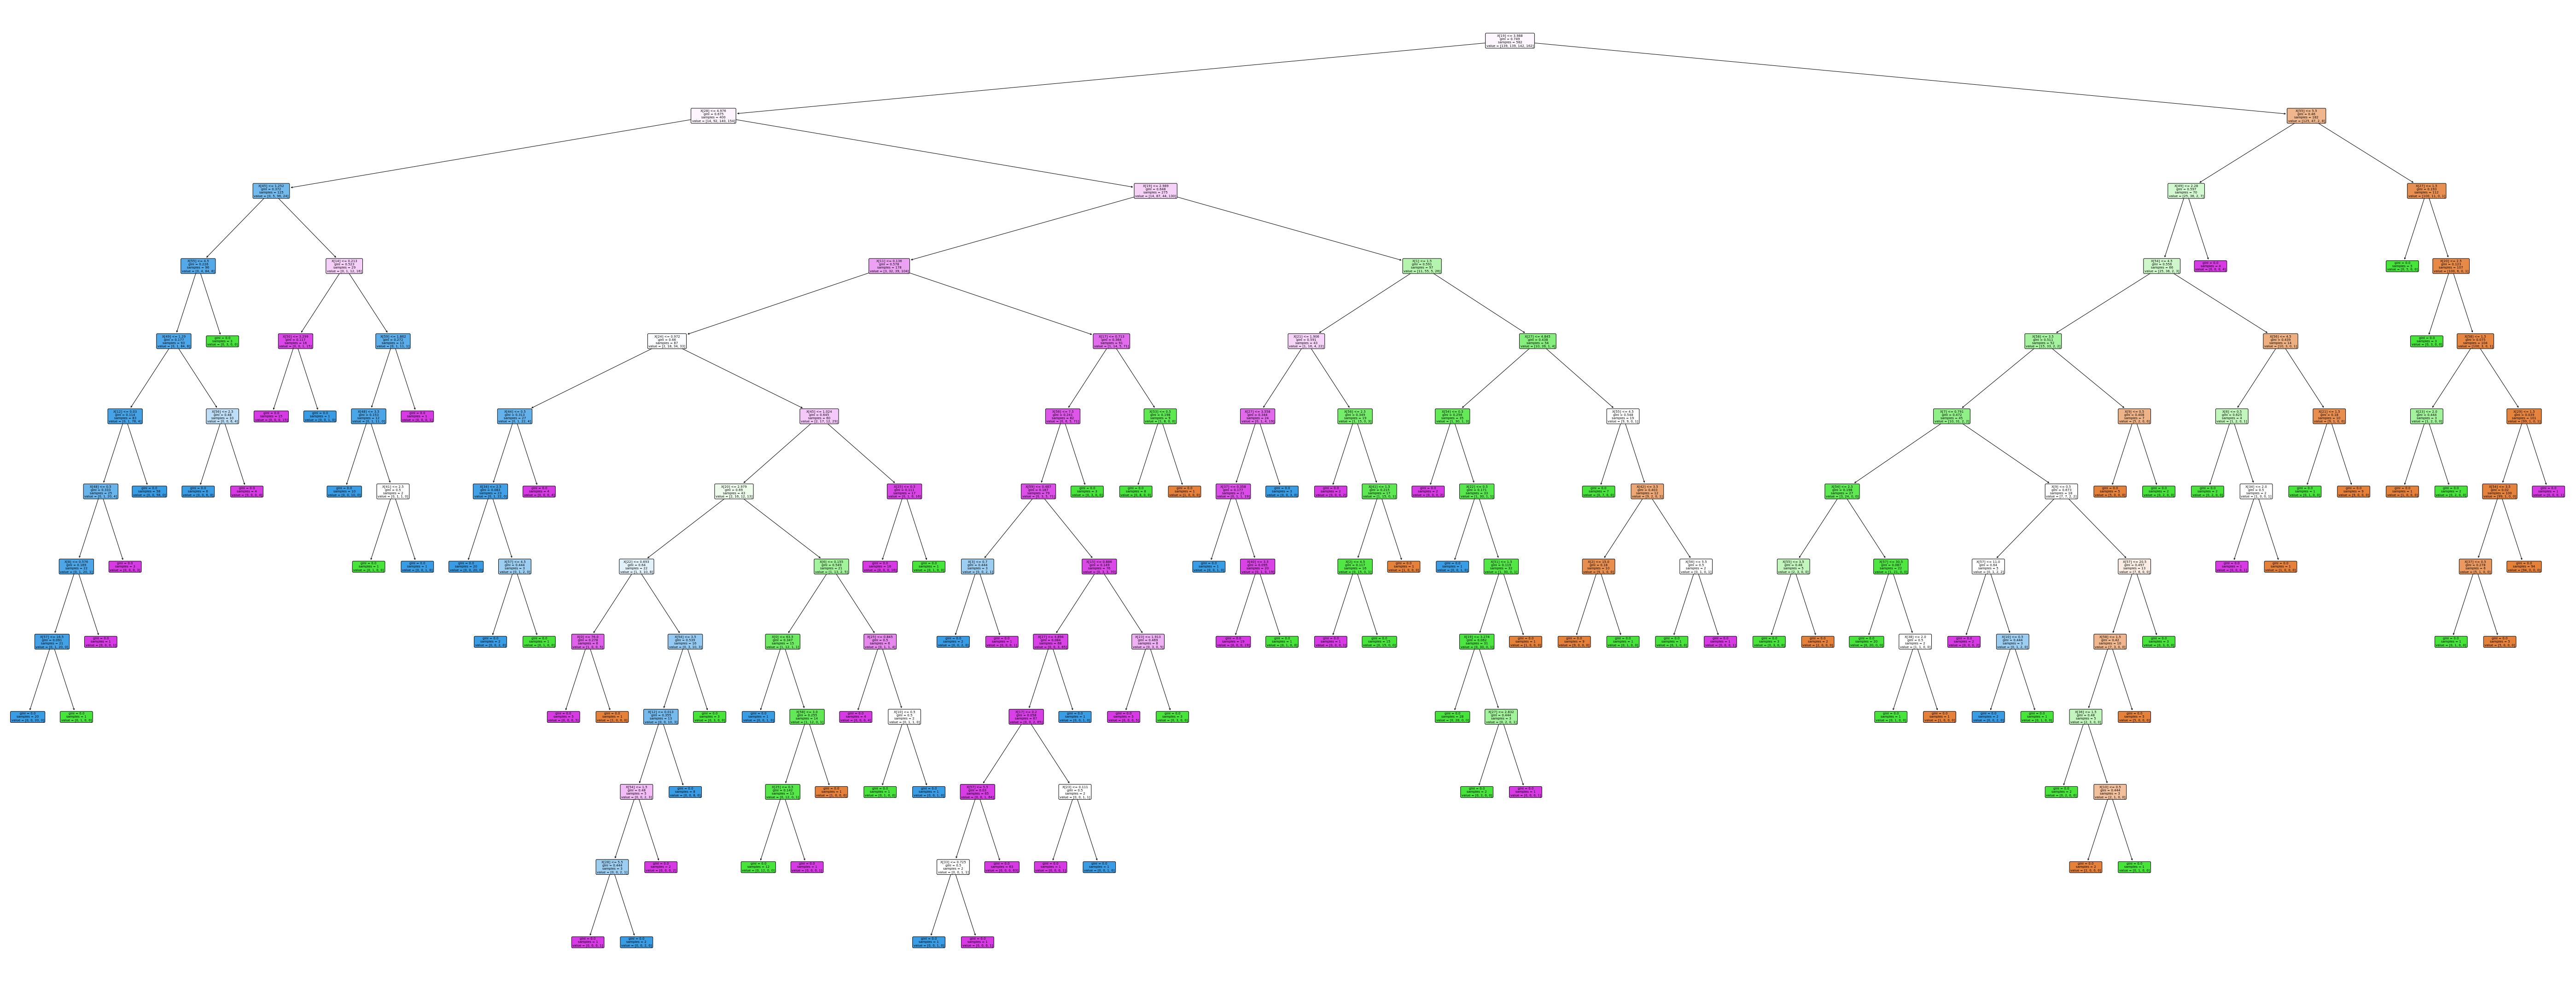

In [16]:
# Εμφανίζουμε το πλήρως αναπτυγμένο δέντρο απόφασης 
plt.figure(figsize=(100,39))
plot_tree(clf,filled=True,
         rounded=True)

In [17]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 34,
 'splitter': 'best'}

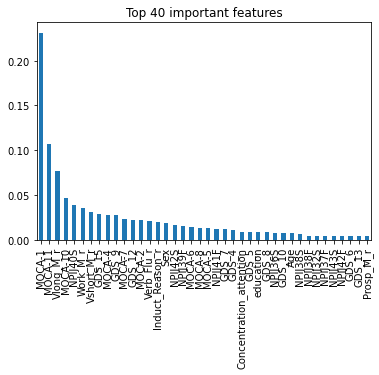

In [18]:
# feature importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

In [19]:
# οι τιμές (δηλαδή τα Y) που προβλέπει το μοντέλο που κατασκευάσθηκε, σύμφωνα με τα δεδομένα ελέγχου Χ
predictions=clf.predict(X_test)
predictions

array([0, 0, 1, 1, 2, 0, 1, 2, 2, 3, 3, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 1, 3, 0,
       0, 1, 3, 1, 3, 0, 3, 1, 3, 3, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 2, 0,
       1, 0, 2, 0, 2, 1, 2, 2, 0, 3, 3, 2, 1, 1, 3, 3, 1, 2, 2, 3, 3, 1,
       1, 1, 0, 1, 3, 1, 2, 3, 1, 1, 0, 0, 1, 1, 1, 0, 1, 3, 1, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 1, 2, 2, 1, 1, 1, 3, 2, 1,
       1, 3, 3, 1, 0, 3, 0, 3, 0, 2, 3, 1, 1, 2, 3, 0, 1, 0, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 2, 1, 2, 3, 1, 0, 0, 1, 3, 0, 0, 2, 3, 3, 1, 0, 3,
       3, 0, 3, 2, 0, 3, 0, 1, 1, 2, 0, 2, 1, 3, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 0, 1, 1, 3, 3, 2, 2, 0, 1, 1, 3, 3, 0, 3, 0, 1, 1, 2, 1, 0, 0,
       2, 3, 2, 1, 0, 0, 3, 3], dtype=int64)

In [20]:
# ακρίβεια (accuracy) κατά τον έλεγχο στο σύνολο δοκιμής (a' τρόπος)
# Υ_test είναι οι ακριβείς τιμές απόκρισης του συνόλου δοκιμής και θέλουμε να ελέγξουμε αν ταυτίζονται με εκείνες που προέβλεψε το μοντέλο
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.692

In [21]:
# ακρίβεια (accuracy) κατά τον έλεγχο στο σύνολο δοκιμής (β' τρόπος) (πολύ χαμηλό σκόρ-πιθανή υπερπροσαρμογή στα δεδομένα εκπαίδευσης)
clf.score(X_test,Y_test)

0.692

In [22]:
# υπερεκπαίδευση!!!
clf.score(X_train,Y_train)

1.0

In [23]:
# συνοπτικά όλες οι μετρικές
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73        69
           1       0.57      0.64      0.60        69
           2       0.81      0.71      0.76        66
           3       0.64      0.76      0.69        46

    accuracy                           0.69       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.70      0.69      0.70       250



In [24]:
# precision,recall,f1 δεν γίνονται όπως με το accuracy λόγω multiclass target!!!!
from sklearn.metrics import f1_score
f1_score(Y_test,predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Aναζήτηση βέλτιστης τιμής της υπερπαραμέτρου alpha με στόχο την αύξηση της απόδοσης (Α' και Β' τρόπος)

# Α' τρόπος

In [25]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [26]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1411831902819256


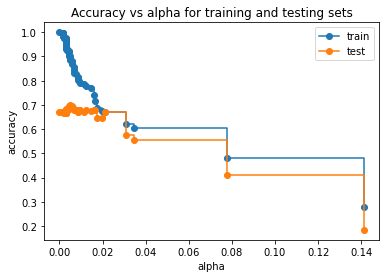

In [27]:
# Mε το γράφημα μπορούμε να διαπιστώνουμε (προσεγγιστικά) την τιμή εκείνη του complexity parameter alpha που βελτιστοποιεί την ακρίβεια στο σύνολο δοκιμής.
# χρησιμοποιούμε κάθε φορά τα ίδια σύνολα εκπαίδευσης και δοκιμής (στον β' τρόπο θα χρησιμοποιηθεί ολόκληρο το αρχικο σύνολο δεδομένων)
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [28]:
# για α=0.018 εκπαιδεύουμε ξανά και ελέγχουμε αν η απόδοση αυξήθηκε στο σύνολο δοκιμής.
# Επιλέγουμε το α ως μέτρο για το κλάδεμα του δέντρου 
clf=DecisionTreeClassifier(ccp_alpha=0.018,random_state=23)
clf=clf.fit(X_train,Y_train)

In [29]:
predictions=clf.predict(X_test)
predictions

array([1, 0, 0, 1, 2, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       0, 1, 3, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 3, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 3, 1, 0, 3, 1, 0, 3, 2, 2, 0,
       0, 0, 2, 1, 2, 1, 3, 2, 0, 2, 3, 2, 1, 1, 3, 2, 3, 3, 2, 2, 3, 1,
       1, 0, 0, 1, 2, 2, 2, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 0, 1, 2, 2,
       1, 3, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       2, 3, 0, 1, 0, 2, 0, 2, 3, 1, 0, 0, 1, 3, 0, 0, 2, 2, 2, 1, 0, 1,
       2, 0, 3, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 3, 0, 3, 0, 1, 0, 2, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 1, 2], dtype=int64)

In [30]:
# ακρίβεια (accuracy) κατά τον έλεγχο στο σύνολο δοκιμής (β' τρόπος) (χειρότερη απο το unpruned αλλά θα προτιμούσαμε αυτό το μοντέλο διότι τουλάχιστον δεν είναι υπερεκπαιδευμένο)
clf.score(X_test,Y_test)

0.648

In [31]:
# οχι υπερπροσαρμογή
clf.score(X_train,Y_train)

0.6872852233676976

In [32]:
# συνοπτικά όλες οι μετρικές
# το μέτρο weighted δεν ενδιαφέρει καθώς αφορά άνισα σύνολα δεδομένων
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78        69
           1       0.57      0.67      0.61        69
           2       0.61      0.80      0.69        66
           3       0.54      0.30      0.39        46

    accuracy                           0.65       250
   macro avg       0.65      0.62      0.62       250
weighted avg       0.66      0.65      0.64       250



In [33]:
cm = confusion_matrix(Y_test,predictions)
cm

array([[49, 20,  0,  0],
       [ 6, 46, 10,  7],
       [ 0,  8, 53,  5],
       [ 1,  7, 24, 14]], dtype=int64)

# Β' τρόπος (Νested CV)

In [34]:
# Κάνουμε nested CV 
# θέτουμε f1_micro, f1_macro, recall_micro, recall_macro κτλ, ανάλογα με την μετρική που επιθυμούμε
# αποφεύγεται η υπερπαράμετρος ccp_alpha = 0 γιατί οδηγεί σε υπερπροσαρμογή
# θέτοντας refit=True το μοντέλο με τις βέλτιστες παραμέτρους (best_estimator_) προσαρμόζεται αυτόματα σε ολ΄όκληρο το σύνολο δεδομένων
from sklearn.model_selection import GridSearchCV,cross_val_score,RepeatedKFold,KFold

clf=DecisionTreeClassifier(random_state=6)
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['ccp_alpha']=[0.012, 0.013, 0.014, 0.018, 0.02]
space['max_features']=[5, 6, 7, 8, 9, 'sqrt']
space['criterion']=['gini', 'entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True,return_train_score=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
# τα αποτελέσματα για την απόδοση σε κάθε εξωτερικό βρόχο
nested_scores

array([0.58333333, 0.70238095, 0.69879518, 0.6626506 , 0.6626506 ,
       0.68674699, 0.6746988 , 0.51807229, 0.73493976, 0.61445783])

In [35]:
nested_scores.mean()

0.6538726333907057

In [36]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [37]:
# το βέλτιστο μοντέλο  αφού έχει προσαρμοστεί σε ολόκληρο το σύνολο δεδομένων σύμφωνα με την μέθοδο nested cv
# είμαστε βέβαιοι οτι αυτό είναι το μοντέλο με τις βέλτιστες υπερπαραμέτρους για το συγκεκριμένο σύνολο δεδομένων αφού αυτό μας το εξασφαλίζει η μέθοδος nested cv
bestmodel=search.best_estimator_
bestmodel

DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy', max_features=8,
                       random_state=6)

In [38]:
search.best_params_

{'ccp_alpha': 0.012, 'criterion': 'entropy', 'max_features': 8}

In [39]:
search.cv_results_

{'mean_fit_time': array([0.00205827, 0.00440931, 0.00501966, 0.01001773, 0.00753422,
        0.0083117 , 0.00472355, 0.00456963, 0.0090941 , 0.00877438,
        0.00908237, 0.00760598, 0.00821681, 0.0048408 , 0.00407   ,
        0.00527263, 0.00320082, 0.01235847, 0.00792775, 0.00489459,
        0.00593381, 0.00708342, 0.0260591 , 0.01356516, 0.01161485,
        0.00957384, 0.00563025, 0.01257887, 0.00833693, 0.00654035,
        0.00325394, 0.00938735, 0.00678678, 0.00662122, 0.00672574,
        0.00706358, 0.00649204, 0.00640364, 0.00700397, 0.00335674,
        0.00976276, 0.00232477, 0.0065783 , 0.00654411, 0.00307117,
        0.00652742, 0.00654411, 0.00613632, 0.00090489, 0.00651765,
        0.00472617, 0.00544634, 0.00984921, 0.00859241, 0.00687733,
        0.00479865, 0.00298038, 0.00594368, 0.00558743, 0.00562854]),
 'std_fit_time': array([0.00411654, 0.00408762, 0.00280088, 0.01141096, 0.00179333,
        0.00273754, 0.0042993 , 0.0062767 , 0.00695979, 0.00770704,
        0.004

In [40]:
# βελτιώθηκε ο δείκτης f1-micro σε σχέση με τον α' τρόπο
nested_scores.mean()

0.6538726333907057

In [41]:
X_test.iloc[0:1]

Age  Sex  education  GDS_1  GDS_2  GDS_3  GDS_4  GDS_5  GDS_6  GDS_7  \
28   70    2        6.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

    GDS_8  GDS_9  GDS_10  GDS_11  GDS_12  GDS_13  GDS_14  GDS_15  \
28    1.0    1.0     1.0     1.0     0.0     1.0     1.0     1.0   

    Antidepressants  MOCA-1  MOCA-2  MOCA-4  MOCA-5  MOCA-6  MOCA-7  MOCA-8  \
28              0.0     4.0     3.0     2.0     1.0     5.0     2.0     0.0   

    MOCA-9  MOCA-10  MOCA-11  NPIJ32S  NPIJ32F  NPIJ33S  NPIJ33F  NPIJ34S  \
28     2.0      1.0      6.0        0      0.0        0        0      0.0   

    NPIJ34F  NPIJ35S  NPIJ35F  NPIJ36S  NPIJ36F  NPIJ37S  NPIJ37F  NPIJ38S  \
28        0        1        4      1.0      4.0        0        0        0   

    NPIJ38F  NPII39J  NPIJ39F  NPIJ40S  NPIJ40F  NPIJ41S  NPIJ41F  NPIJ42S  \
28        0        0        0      1.0      4.0        0        0      1.0   

    NPIJ42F  NPIJ43S  NPIJ43F  Prosp_M_r  Vshort_M_r  Vlong_M_r  Work_M_r  \
28      4.0        1        4          0           4          5         3   

    Verb_Flu_r  Induct_Reason_r  Concentration_attention  
28           6                2                      5.0

In [42]:
# η αντίστοιχη τιμή της κλάσης στην οποία ανήκει η πρώτη παρατήρηση του συνόλου εκπαίδευσης
Y_test.iloc[0:1]

28    1
Name: diagnosis, dtype: int64

In [43]:
len(X_test)

250

In [44]:
bestmodel.predict(X_test)

array([1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 3, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 3, 0, 0, 0, 1, 3, 0, 1, 0,
       0, 3, 2, 1, 0, 0, 3, 3, 3, 2, 1, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 1,
       0, 0, 2, 0, 2, 3, 1, 2, 0, 3, 1, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 0, 0, 2, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 2, 1,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 3, 0, 2, 3, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 1, 0, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 1, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 3, 3, 1, 0, 3, 0, 1, 1, 1, 3, 1, 0, 2, 3, 0, 0, 0, 3, 2, 3, 2,
       2, 3, 0, 3, 0, 2, 0, 2, 3, 3, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1, 0, 2,
       2, 0, 3, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 0, 3, 1, 3, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 1, 0, 2, 1, 0, 0,
       2, 3, 2, 0, 0, 0, 3, 3], dtype=int64)

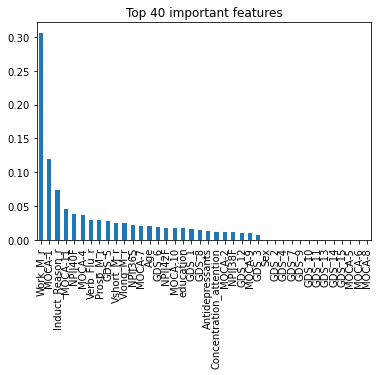

In [45]:
# feature importance
feat_importances = pd.Series(bestmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

## ΟVO και OVA (ή OVR)

In [46]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score


In [47]:
# εκπαίδευση αλγορίθμου ΟVO με τις προεπιλεγμένες υπερπαραμέτρους του δέντρου απόφασης
dec1= OneVsOneClassifier(DecisionTreeClassifier(random_state=4))

dec1.fit(X_train, Y_train)
y_pred = dec1.predict(X_test)


print('Precision-micro of OvO Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvO Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvO Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))


Precision-micro of OvO Classifier: 0.68
Recall-micro of OvO Classifier: 0.68
f1-micro of OvO Classifier: 0.68


In [48]:
# εξετάζω την υπερεκπαίδευση
dec1.score(X_train,Y_train)

1.0

In [49]:
# nested cv για ΟVO
# για τον συντονισμό των υπερπαραμέτρων με τους ταξινομητές OVO και OVR χρησιμοποιείται το πρόθεμα 'estimator__' για κάθε υπερπαράμετρο που ελέγχουμε
clf=OneVsOneClassifier(DecisionTreeClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__ccp_alpha']=[0.012, 0.013, 0.014, 0.018, 0.02]
space['estimator__max_features']=[5, 6, 7, 8, 9, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.64285714, 0.63095238, 0.68674699, 0.56626506, 0.60240964,
       0.75903614, 0.71084337, 0.74698795, 0.6626506 , 0.69879518])

In [50]:
nested_scores.mean()

0.670754446356856

In [51]:
bestmodel_ovo=search.best_estimator_
bestmodel_ovo

OneVsOneClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.012,
                                                    criterion='entropy',
                                                    max_features=5,
                                                    random_state=6))

In [52]:
dec2= OneVsRestClassifier(DecisionTreeClassifier(random_state=4))
dec2.fit(X_train, Y_train)

y_pred = dec2.predict(X_test)

print('Precision-micro of OvR Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvR Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvR Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))

Precision-micro of OvR Classifier: 0.62
Recall-micro of OvR Classifier: 0.62
f1-micro of OvR Classifier: 0.62


In [53]:
dec2.score(X_train,Y_train)

1.0

In [54]:
len(dec1.estimators_)

6

In [55]:
# nested cv για ΟVR
clf=OneVsRestClassifier(DecisionTreeClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__ccp_alpha']=[0.012, 0.013, 0.014, 0.018, 0.02]
space['estimator__max_features']=[5, 6, 7, 8, 9, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.71428571, 0.75      , 0.59036145, 0.60240964, 0.60240964,
       0.62650602, 0.6746988 , 0.65060241, 0.75903614, 0.65060241])

In [56]:
nested_scores.mean()

0.6620912220309811

In [57]:
bestmodel_ovr=search.best_estimator_
bestmodel_ovr

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.012,
                                                     criterion='entropy',
                                                     max_features=9,
                                                     random_state=6))

In [58]:
bestmodel_ovr.predict(X_test)

array([1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 3, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0,
       0, 1, 3, 0, 0, 3, 1, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 3, 2, 3, 1, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 0,
       0, 0, 2, 0, 2, 1, 1, 2, 0, 3, 2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 2, 0, 2, 2,
       2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 2, 3, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 1, 1, 3, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 0, 2, 2, 1,
       0, 3, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 0, 3, 3, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 3, 0, 2, 0, 2, 3, 1, 0, 0, 1, 3, 0, 1, 2, 3, 2, 1, 0, 1,
       2, 0, 3, 2, 1, 3, 0, 0, 0, 3, 0, 3, 0, 3, 1, 1, 2, 2, 2, 0, 3, 0,
       2, 0, 2, 1, 3, 2, 3, 2, 0, 0, 3, 3, 1, 0, 3, 0, 1, 0, 2, 1, 0, 0,
       2, 3, 3, 0, 0, 0, 3, 3], dtype=int64)

In [59]:
# κάνουμε προβλέψεις (η πρόβλεψη της 3ης παρατήρησης απο το σύνολο δοκιμής) 
out=bestmodel_ovr.predict(X_test)
out[2]

0


# LIME / SHAP

# LIME explanations

In [46]:
!pip install lime

In [47]:
# LIME
import lime
from lime import lime_tabular
explainer=lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                           mode='classification',
                                           feature_names=X_train.columns.values,
                                            verbose=True,
                                           random_state=34)

In [57]:
# ερμηνεία για την πρόβλεψη της 2ης παρατήρησης (j=1) του συνόλου δοκιμής
# προεπιλογή για num_features είναι το 10 (εμφανίζει τις 10 πιο σημαντικές μεταβλητές)
# για top_labels=2 θα εμφανιστούν τα αποτελέσματα για τις δύο πιο σημαντικές κλάσεις που προέβλεψε το μοντέλο (προφανώς μόνο μία προβλέπει)
# για top_labels=1 εμφανίζουμε μόνο την κλάση που προέβλεψε το μοντέλο (δηλα΄δή εκείνη με τη μεγαλύτερη πιθανότητα)
random_state=1
j=1
exp=explainer.explain_instance(data_row=X_test.iloc[j],
                              predict_fn=bestmodel.predict_proba,num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 0.060042052598258414
Prediction_local [0.27066047]
Right: 0.967032967032967


C:\Users\BILL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [96]:
exp.predict_proba

array([0.96703297, 0.03296703, 0.        , 0.        ])

In [97]:
# οι συντελεστές του απλουστευμένου μοντέλου μέσω της μεθόδου LIME
map1=exp.as_map()
map1

{0: [(56, 0.06803669964780422),
  (53, 0.05358359625306007),
  (21, 0.042699151358883726),
  (20, 0.03188071925575859),
  (42, -0.03094128915371306),
  (58, 0.029380584467289958),
  (40, 0.026833383855425965),
  (44, -0.0188751871870739),
  (32, -0.01800790919994854),
  (29, -0.017773940235043396)]}

In [92]:
type(map1)

dict

In [95]:
# η πραγματική τιμή απόκρισης της 2ης παρατήρησης (του συνόλου δοκιμής)
Y_test.iloc[1]

0

In [96]:
# Το μοντέλο bestmodel προβλέπει ότι η 2η παρατήρηση του συνόλου δοκιμής κατηγοριοποιείται σύμφωνα με την κλάση "0" με πιθανότητα 0.97
# έχουμε ακριβή πρόβλεψη αφού η πραγματική και η τιμή πρόβλεψης ταυτίζονται
out1=bestmodel.predict(X_test)
out1[1]


0

In [97]:
# οι πιθανότητες πρόβλεψης για την 2η παρατήρηση του συνόλου δοκιμής
out2=bestmodel.predict_proba(X_test)
out2[1]

array([0.96703297, 0.03296703, 0.        , 0.        ])

# SHAP 

In [98]:
!pip install shap

In [99]:
import shap
shap.initjs()

In [100]:
# υπολογισμός των shapley values μέσω του μοντέλου SHAP για κάθε παρατήρηση του συνόλου δοκιμής(αν θέλαμε να ερμηνεύσουμε ένα παράδειγμα του συνόλου εκπαίδευσης θα είχαμε ως όρισμα X_train)
# το shap.TreeExplainer επιταχύνει τους υπολογισμούς των τιμών Shapley 
class_names = ['0', '1', '2', '3']
explainer=shap.TreeExplainer(bestmodel)
shap_values = explainer.shap_values(X_test)
shap_values

[array([[ 0.        ,  0.        ,  0.00912528, ...,  0.        ,
          0.17249746,  0.        ],
        [ 0.        ,  0.        ,  0.0015832 , ...,  0.        ,
          0.05735837,  0.        ],
        [ 0.        ,  0.        ,  0.00019267, ...,  0.        ,
         -0.00796969,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.0015832 , ...,  0.        ,
          0.05572016,  0.        ],
        [ 0.        ,  0.        , -0.02316418, ...,  0.        ,
          0.14561072,  0.        ],
        [ 0.        ,  0.        ,  0.00019267, ...,  0.        ,
         -0.007584  ,  0.        ]]),
 array([[-0.00862812,  0.        ,  0.05310643, ...,  0.00438559,
          0.18424524, -0.00181907],
        [ 0.00097473,  0.        ,  0.01236438, ...,  0.00879118,
          0.06196788, -0.00298008],
        [-0.0155412 ,  0.        ,  0.00227017, ...,  0.00886476,
         -0.00944582, -0.00144845],
        ...,
        [-0.00045432,  0.        ,  0.01236438, ...,  

In [101]:
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test[0:])

In [102]:
X_test.iloc[1:2]

Age  Sex  education  GDS_1  GDS_2  GDS_3  GDS_4  GDS_5  GDS_6  GDS_7  \
378   82    2        6.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0   

     GDS_8  GDS_9  GDS_10  GDS_11  GDS_12  GDS_13  GDS_14  GDS_15  \
378    1.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     Antidepressants  MOCA-1  MOCA-2  MOCA-4  MOCA-5  MOCA-6  MOCA-7  MOCA-8  \
378              0.0     4.0     3.0     2.0     1.0     3.0     1.0     0.0   

     MOCA-9  MOCA-10  MOCA-11  NPIJ32S  NPIJ32F  NPIJ33S  NPIJ33F  NPIJ34S  \
378     1.0      5.0      6.0        0      0.0        0        0      0.0   

     NPIJ34F  NPIJ35S  NPIJ35F  NPIJ36S  NPIJ36F  NPIJ37S  NPIJ37F  NPIJ38S  \
378        0        1        3      1.0      3.0        0        0        0   

     NPIJ38F  NPII39J  NPIJ39F  NPIJ40S  NPIJ40F  NPIJ41S  NPIJ41F  NPIJ42S  \
378        0        0        0      1.0      3.0        0        0      0.0   

     NPIJ42F  NPIJ43S  NPIJ43F  Prosp_M_r  Vshort_M_r  Vlong_M_r  Work_M_r  \
378      0.0        0        0          1           6          8        10   

     Verb_Flu_r  Induct_Reason_r  Concentration_attention  
378          16                2                      5.0

In [103]:
X_test

Age  Sex  education     GDS_1     GDS_2     GDS_3     GDS_4     GDS_5  \
28    70    2   6.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
378   82    2   6.000000  1.000000  1.000000  1.000000  0.000000  0.000000   
432   65    2   9.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
163   67    1  12.000000  0.000000  1.000000  0.000000  1.000000  0.000000   
556   71    2  12.000000  0.812830  0.812830  0.812830  0.000000  0.000000   
10    60    2   6.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
301   53    2  18.000000  1.000000  0.000000  1.000000  1.000000  1.000000   
628   57    2   6.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
388   79    1  12.000000  0.000000  1.000000  0.000000  1.000000  0.000000   
656   81    1   6.000000  0.744824  0.744824  0.744824  0.000000  0.744824   
788   78    1   6.000000  0.278724  1.000000  0.000000  1.000000  0.278724   
637   73    1   6.000000  0.160202  0.160202  0.160202  0.160202  0.160202   
27    76    2   6.000000  0.000000  0.000000  1.000000  1.000000  0.000000   
397   81    1  12.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146   68    2   6.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
101   53    2  22.000000  1.000000  1.000000  1.000000  0.000000  1.000000   
155   84    1  14.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
579   72    1   6.101023  0.000000  0.000000  0.000000  0.000000  0.000000   
347   78    1   6.000000  1.000000  0.000000  1.000000  1.000000  1.000000   
303   84    1   6.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
530   73    1   7.972446  0.000000  0.000000  0.000000  0.000000  0.000000   
445   51    2  16.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
233   69    1  16.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
61    65    2  14.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
465   64    2   6.000000  0.000000  1.000000  1.000000  1.000000  0.000000   
400   72    2  12.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
65    67    1   6.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
667   74    1   6.000000  0.593637  1.000000  1.000000  0.593637  0.593637   
322   72    1   6.000000  0.000000  1.000000  1.000000  0.000000  0.000000   
477   67    2  12.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
577   73    1   6.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
382   68    2  12.000000  1.000000  1.000000  1.000000  1.000000  0.000000   
487   78    2  15.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
80    69    1   6.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
51    69    2  16.000000  1.000000  1.000000  1.000000  0.000000  1.000000   
751   74    2   5.404527  0.801509  1.000000  0.801509  0.000000  0.801509   
195   59    1  10.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
175   66    1  10.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
270   68    1  10.000000  0.000000  1.000000  0.000000  0.000000  1.000000   
157   68    2   6.000000  1.000000  1.000000  0.000000  0.000000  0.000000   
791   65    1  13.620714  0.810357  1.000000  1.000000  0.810357  0.810357   
358   75    1  16.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
498   67    1   4.000000  0.000000  1.000000  1.000000  0.000000  0.000000   
103   64    1   9.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
108   54    2  12.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
536   73    2  12.000000  0.656972  0.000000  0.000000  0.000000  0.656972   
81    79    1  12.000000  0.000000  1.000000  1.000000  0.000000  0.000000   
314   75    1  12.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
319   73    2   6.000000  1.000000  1.000000  1.000000  0.000000  1.000000   
429   64    2  12.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
807   78    1   9.114448  0

In [104]:
Y_test.iloc[1:2]

378    0
Name: diagnosis, dtype: int64

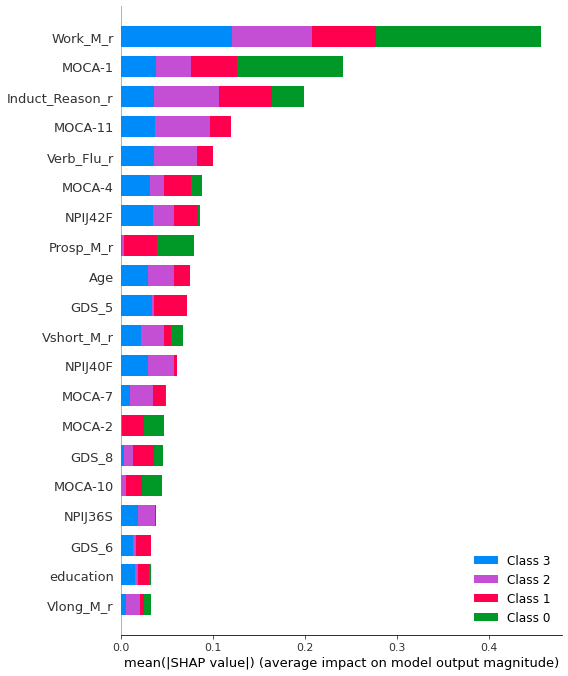

In [105]:
# feature importance (ολική ερμηνεία)
# εκτός απο το κλασικό feature importance έχουμε και την επίδραση της κάθε μεταβλητής ανα κλάση εξόδου
shap.summary_plot(shap_values[0:], X_test, plot_type="bar")

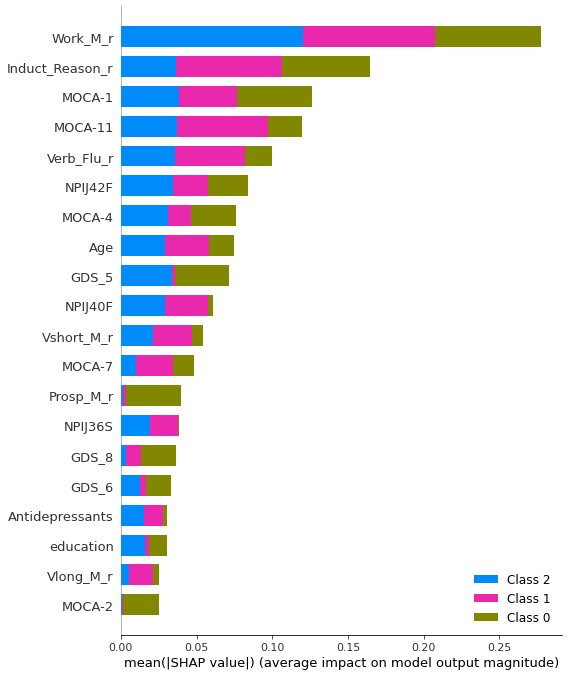

In [106]:
shap.summary_plot(shap_values[1:], X_test, plot_type="bar")

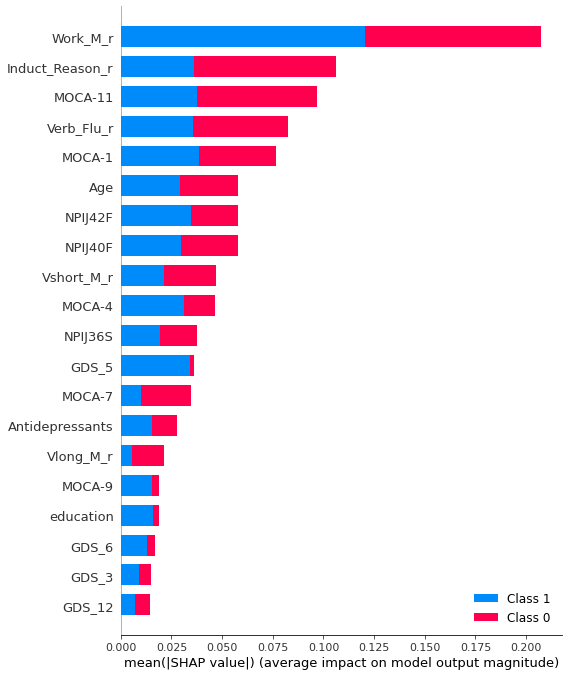

In [107]:
shap.summary_plot(shap_values[2:], X_test, plot_type="bar")

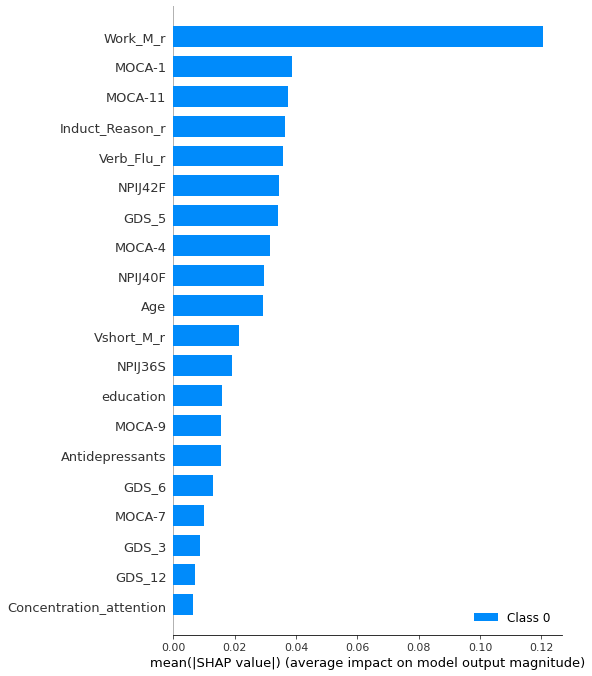

In [108]:
shap.summary_plot(shap_values[3:], X_test, plot_type="bar")

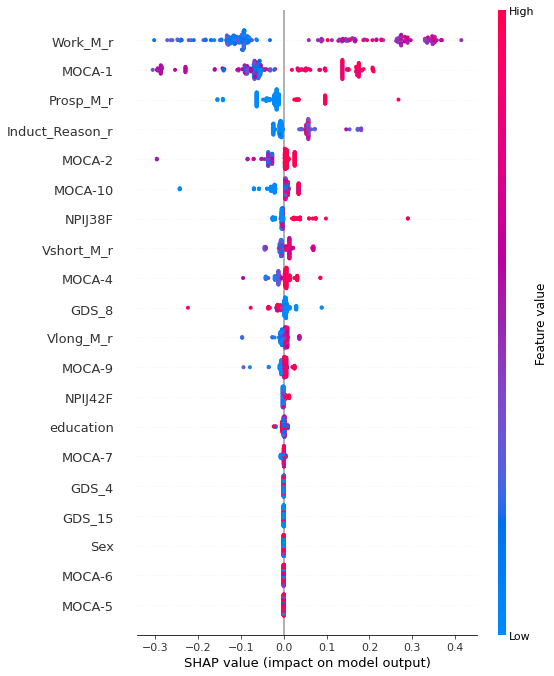

In [109]:
# global (το ίδιο με πριν είναι το σχήμα)
# Καθένα απο τα σημεία στο summary plot είναι η τιμή Shapley ενός χαρακτηριστικού για ένα παράδειγμα
# συνδυάζεται το feature importance με την επίδραση της κάθε μεταβλητής/χαρακτηριστικού
# αφορά την κλάση "0"
shap.summary_plot(shap_values[0], X_test.values, feature_names = X.columns)

In [110]:
# τοπική ερμηνεία για την 2η παρατήρηση του συνόλου δοκιμής (για την ακρίβεια είναι η 378η παρατήρηση του αρχικού συνόλου Χ)
i=1
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X.columns)

In [111]:
len(X_test)

250

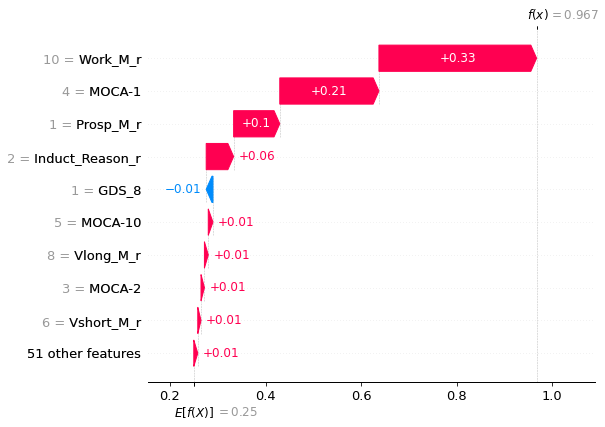

In [112]:
# τοπική ερμηνεία για την 2η παρατήρηση του συνόλου δοκιμής (εναλλακτικό σχήμα-προτιμητέο_)
row =1
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))